<h1>Scientific coding bootcamp notebook 4: Fourier analysis and the FFT.</h1>

The big idea of Fourier analysis is that complex exponentials like $e^{2πifx}$, with $f$ an integer, form an orthonormal basis for periodic 1D functions on the unit interval $[0,1]$. 

In [1]:
using FFTW, Plots

In [2]:
const Lattice = AbstractRange

function expOverlap(grid::Lattice,f::Vector{T},n::Real) where {T<:Number}
    integrand = f .* exp.(-2π*im*grid*n)
    return sum(integrand) * step(grid)
end

expOverlap (generic function with 1 method)

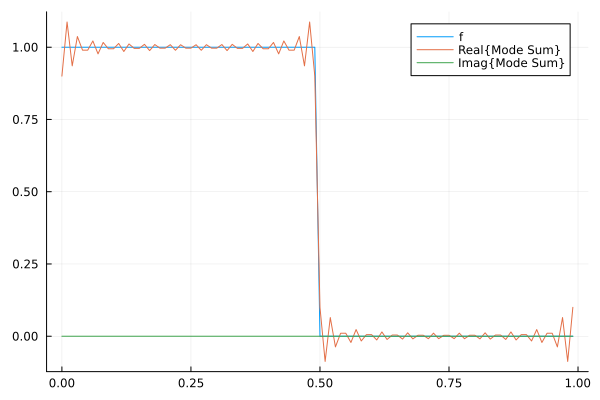

In [15]:
# Fill in the code below to decompose the function f as a sum of complex exponentials.  Check that it matches f reasonably well. 
grid = 0:0.01:1-0.01
f = (x -> x < 0.5 ? 1.0 : 0.0).(grid)      # The  "... ? ... : ..." is called a ternary operator.  Look up how it works if it's unfamiliar.
modes = -40:40
coeffs = [expOverlap(grid,f,n) for n in modes]
plot(grid,f,label="f")
plot!(grid,real.(sum(exp.(2pi*im*grid*modes[n])*coeffs[n] for n=1:length(modes))),label="Real{Mode Sum}")
plot!(grid,imag.(sum(exp.(2pi*im*grid*modes[n])*coeffs[n] for n=1:length(modes))),label="Imag{Mode Sum}")